## First Healty Cities Report - Quick EDA

In this notebook i tried to expand the data for better understanding on real dataset. Hope you enjoy!

### First we need to import necessary libraries for exploring data

In [1]:
import numpy as np # for linear algebra.
import pandas as pd
import matplotlib.pyplot as plt # for visualization.
import seaborn as sns # for visualization visualization aswell.

# this command is making our plots visible on notebooks.
%matplotlib inline
# setting our figure size for following graphs and plots.
plt.rcParams["figure.figsize"] = (12,5)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# readed 'csv' file with using read_csv method.
df = pd.read_csv('/kaggle/input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv', sep=',')

/kaggle/input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv


Let's look how is our data look like

In [2]:
# looking first 5 rows of the data. Make sure everything is ok.
df.head(5)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


Now we want to see how many columns we have totally

In [3]:
# shape method is used for looking how many rows and columns we have. 
# [0] represent rows for each data and [1] is for every how many columns we have.
df.shape[1]

12

In [4]:
# checking if there is any null value in this dataset.
df.isnull().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64


There is no null data in this dataset, <b>but</b> there is missing values in this dataset represented with '-' character, Let's continue.

In [5]:
# this method is used for quick understanding of descriptive statistics about our dataset.
df.describe()

,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
count,44.000000,44.00000,44.000000,44.000000,44.000000
mean,22.500000,78.17500,6.435000,213.977273,1443.113636
std,12.845233,5.30437,0.991202,127.190297,1388.803270
min,1.000000,56.30000,3.570000,23.000000,250.000000
25%,11.750000,75.40000,5.870000,125.250000,548.000000
50%,22.500000,80.40000,6.900000,189.500000,998.000000
75%,33.250000,81.80000,7.175000,288.250000,1674.250000
max,44.000000,83.20000,7.800000,585.000000,6417.000000


Some of the data is not showing here because there is some missing values and different dtypes on this datalist lets make them iterable for this method.
First of all we need to implement a lambda function for some columns having '%' and '£' sign.

In [6]:
# checking data types of each column in this dataset.
df.dtypes

City                                       object
Rank                                        int64
Sunshine hours(City)                       object
Cost of a bottle of water(City)            object
Obesity levels(Country)                    object
Life expectancy(years) (Country)          float64
Pollution(Index score) (City)              object
Annual avg. hours worked                   object
Happiness levels(Country)                 float64
Outdoor activities(City)                    int64
Number of take out places(City)             int64
Cost of a monthly gym membership(City)     object
dtype: object

### Making type conversions

In [7]:
# first we need to get rid of '-' on Sunshine hours(City) column and '-' Pollution(Index score) (City) column for able to convert their dtypes.
df['Sunshine hours(City)'] = df['Sunshine hours(City)'].replace(['-'], None)
df['Pollution(Index score) (City)'] = df['Pollution(Index score) (City)'].replace(['-'], None)
df = df.astype({'Rank': int, 'Sunshine hours(City)': int, 'Pollution(Index score) (City)': float})

In [8]:
# The meaning of the function is we are taking the data 'x' and pass the first character, start from index 1 and go through the last character [:-1].
float_maker = lambda x: float(x[1:-1])
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].apply(float_maker)
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].apply(float_maker)
# For obesity levels we need to take the data 'x' and start from index 0 and go through last character - 1 [:-2].
float_maker_2 = lambda x: float(x[0:-2])
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].apply(float_maker_2)

In [9]:
# We need to replace all nan values with mean values of their column.
df['Sunshine hours(City)'].fillna((df['Sunshine hours(City)'].mean()), inplace = True)
df['Pollution(Index score) (City)'].fillna((df['Pollution(Index score) (City)'].mean()), inplace = True)

In [10]:
# Percentage of missing values on Avg Hours Worked column.
(round(len(df[df['Annual avg. hours worked'] == '-']) / len(df['Annual avg. hours worked']) * 100))

25

Now we need to decide what we are going to do with '-' characters which represent missing values on this dataset. I decided to give Geneva mean value of sunshine hours column. But for Annual avg. hours worked column there is too much missing data. It is <b> %25</b> of the dataset. I decided to drop this column.

In [11]:
df.drop('Annual avg. hours worked', axis=1, inplace=True)

In [12]:
# we are setting our rank column as a index.
df = df.set_index('Rank')

Finally, we can see other columns statistical values with describe method.

In [13]:
df.describe().round(3)

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000,44.000
mean,2232.591,1.127,21.925,78.175,50.258,6.435,213.977,1443.114,40.380
std,567.633,0.729,10.196,5.304,22.349,0.991,127.190,1388.803,15.008
min,1405.000,0.100,3.900,56.300,13.080,3.570,23.000,250.000,16.000
25%,1747.500,0.500,19.500,75.400,30.010,5.870,125.250,548.000,31.300
50%,2066.000,1.150,22.300,80.400,50.980,6.900,189.500,998.000,37.300
75%,2626.500,1.600,29.000,81.800,66.350,7.175,288.250,1674.250,47.150
max,3542.000,3.200,36.200,83.200,91.740,7.800,585.000,6417.000,73.100


### Now we can Visualize Data

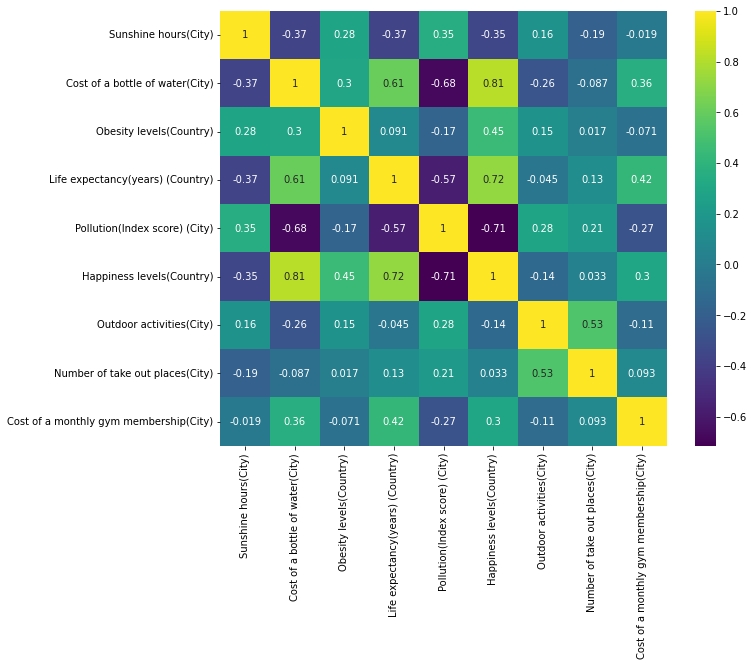

In [14]:
corr = df.corr()

sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='viridis')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

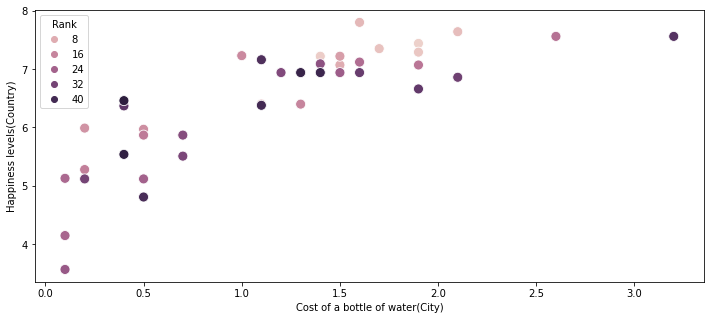

In [15]:
sns.scatterplot(x='Cost of a bottle of water(City)', y='Happiness levels(Country)', data=df, hue='Rank', s= 100)
plt.show()

This is kind a wrong relation. And also there is couple outlier values.
<b>Be Careful!</b> This dataset do not have enough data to validate this relation is correct or not.

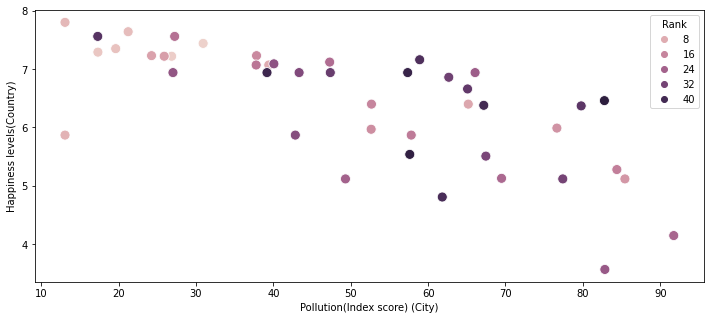

In [16]:
sns.scatterplot(x='Pollution(Index score) (City)', y='Happiness levels(Country)', data=df, hue='Rank', s= 100)
plt.show()

This might be a correct relation!. If the city have lower pollution levels Happiness level is higher.

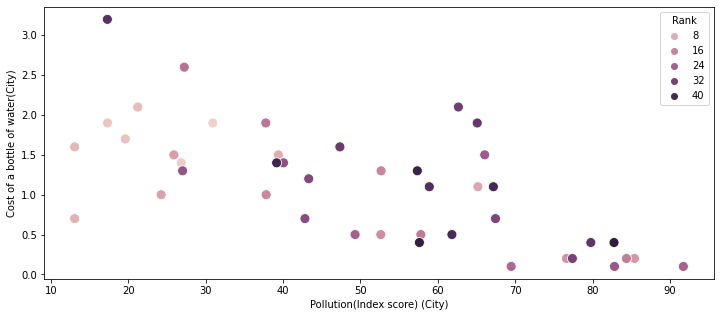

In [17]:
sns.scatterplot(x='Pollution(Index score) (City)', y='Cost of a bottle of water(City)', data=df, hue='Rank',s= 100)
plt.show()

Scatterplot between <b>bottle of water price and pollution</b>. Interesting ??<br>
If you know why this is happened let me know in the comments.

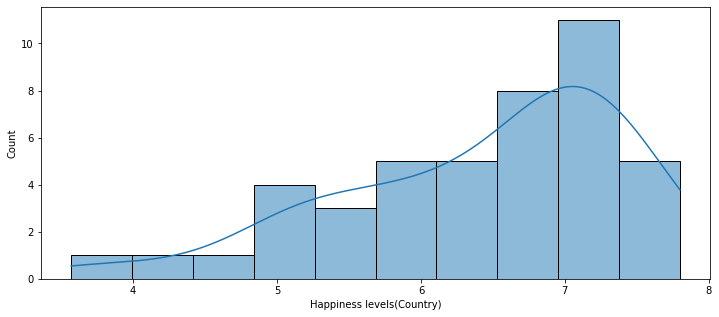

In [18]:
sns.histplot(data=df, x='Happiness levels(Country)', bins = 10, kde=True)
plt.show()

### Conclusion

Thanks for reading my notebook. This is my first EDA work so if there is something wrong let me know on the comments! Thank you :)